In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# reflect an existing database into a new model
conn=engine.connect()
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
inspector = inspect(engine)

m_columns = inspector.get_columns('Measurement')
print("Measurement")
for row in m_columns:
    print(row['name'], row["type"])
    
s_columns = inspector.get_columns('Station')
print("Stations")
for row in s_columns:
    print(row['name'], row["type"])

Measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
Stations
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
results = session.query(Measurement.id, Measurement.station, Measurement.tobs).order_by(Measurement.id.desc()).all()
for result in results: 
     print(result[0], result[1], result[2])

19550 USC00516128 76.0
19549 USC00516128 76.0
19548 USC00516128 76.0
19547 USC00516128 78.0
19546 USC00516128 71.0
19545 USC00516128 76.0
19544 USC00516128 72.0
19543 USC00516128 71.0
19542 USC00516128 70.0
19541 USC00516128 79.0
19540 USC00516128 80.0
19539 USC00516128 74.0
19538 USC00516128 72.0
19537 USC00516128 75.0
19536 USC00516128 71.0
19535 USC00516128 74.0
19534 USC00516128 78.0
19533 USC00516128 79.0
19532 USC00516128 77.0
19531 USC00516128 76.0
19530 USC00516128 80.0
19529 USC00516128 72.0
19528 USC00516128 74.0
19527 USC00516128 79.0
19526 USC00516128 77.0
19525 USC00516128 73.0
19524 USC00516128 75.0
19523 USC00516128 73.0
19522 USC00516128 79.0
19521 USC00516128 77.0
19520 USC00516128 78.0
19519 USC00516128 72.0
19518 USC00516128 72.0
19517 USC00516128 75.0
19516 USC00516128 74.0
19515 USC00516128 77.0
19514 USC00516128 72.0
19513 USC00516128 75.0
19512 USC00516128 78.0
19511 USC00516128 76.0
19510 USC00516128 77.0
19509 USC00516128 72.0
19508 USC00516128 74.0
19507 USC00

19085 USC00516128 71.0
19084 USC00516128 70.0
19083 USC00516128 67.0
19082 USC00516128 72.0
19081 USC00516128 71.0
19080 USC00516128 70.0
19079 USC00516128 67.0
19078 USC00516128 67.0
19077 USC00516128 74.0
19076 USC00516128 69.0
19075 USC00516128 71.0
19074 USC00516128 72.0
19073 USC00516128 69.0
19072 USC00516128 69.0
19071 USC00516128 74.0
19070 USC00516128 69.0
19069 USC00516128 68.0
19068 USC00516128 68.0
19067 USC00516128 71.0
19066 USC00516128 69.0
19065 USC00516128 73.0
19064 USC00516128 71.0
19063 USC00516128 72.0
19062 USC00516128 70.0
19061 USC00516128 68.0
19060 USC00516128 67.0
19059 USC00516128 66.0
19058 USC00516128 65.0
19057 USC00516128 78.0
19056 USC00516128 67.0
19055 USC00516128 67.0
19054 USC00516128 69.0
19053 USC00516128 70.0
19052 USC00516128 66.0
19051 USC00516128 67.0
19050 USC00516128 66.0
19049 USC00516128 72.0
19048 USC00516128 63.0
19047 USC00516128 72.0
19046 USC00516128 69.0
19045 USC00516128 69.0
19044 USC00516128 68.0
19043 USC00516128 68.0
19042 USC00

18449 USC00516128 73.0
18448 USC00516128 76.0
18447 USC00516128 77.0
18446 USC00516128 73.0
18445 USC00516128 70.0
18444 USC00516128 68.0
18443 USC00516128 74.0
18442 USC00516128 69.0
18441 USC00516128 71.0
18440 USC00516128 75.0
18439 USC00516128 69.0
18438 USC00516128 69.0
18437 USC00516128 69.0
18436 USC00516128 70.0
18435 USC00516128 70.0
18434 USC00516128 68.0
18433 USC00516128 69.0
18432 USC00516128 70.0
18431 USC00516128 67.0
18430 USC00516128 70.0
18429 USC00516128 71.0
18428 USC00516128 69.0
18427 USC00516128 67.0
18426 USC00516128 67.0
18425 USC00516128 69.0
18424 USC00516128 66.0
18423 USC00516128 67.0
18422 USC00516128 68.0
18421 USC00516128 70.0
18420 USC00516128 71.0
18419 USC00516128 69.0
18418 USC00516128 71.0
18417 USC00516128 68.0
18416 USC00516128 69.0
18415 USC00516128 72.0
18414 USC00516128 70.0
18413 USC00516128 72.0
18412 USC00516128 70.0
18411 USC00516128 69.0
18410 USC00516128 68.0
18409 USC00516128 67.0
18408 USC00516128 65.0
18407 USC00516128 69.0
18406 USC00

18086 USC00516128 70.0
18085 USC00516128 71.0
18084 USC00516128 69.0
18083 USC00516128 75.0
18082 USC00516128 69.0
18081 USC00516128 69.0
18080 USC00516128 72.0
18079 USC00516128 68.0
18078 USC00516128 72.0
18077 USC00516128 72.0
18076 USC00516128 72.0
18075 USC00516128 71.0
18074 USC00516128 71.0
18073 USC00516128 69.0
18072 USC00516128 70.0
18071 USC00516128 72.0
18070 USC00516128 71.0
18069 USC00516128 69.0
18068 USC00516128 66.0
18067 USC00516128 67.0
18066 USC00516128 67.0
18065 USC00516128 60.0
18064 USC00516128 71.0
18063 USC00516128 66.0
18062 USC00516128 68.0
18061 USC00516128 68.0
18060 USC00516128 69.0
18059 USC00516128 69.0
18058 USC00516128 67.0
18057 USC00516128 67.0
18056 USC00516128 72.0
18055 USC00516128 67.0
18054 USC00516128 64.0
18053 USC00516128 67.0
18052 USC00516128 69.0
18051 USC00516128 64.0
18050 USC00516128 65.0
18049 USC00516128 62.0
18048 USC00516128 66.0
18047 USC00516128 64.0
18046 USC00516128 67.0
18045 USC00516128 65.0
18044 USC00516128 66.0
18043 USC00

17490 USC00516128 73.0
17489 USC00516128 75.0
17488 USC00516128 74.0
17487 USC00516128 74.0
17486 USC00516128 72.0
17485 USC00516128 71.0
17484 USC00516128 70.0
17483 USC00516128 73.0
17482 USC00516128 69.0
17481 USC00516128 76.0
17480 USC00516128 72.0
17479 USC00516128 74.0
17478 USC00516128 74.0
17477 USC00516128 70.0
17476 USC00516128 71.0
17475 USC00516128 71.0
17474 USC00516128 70.0
17473 USC00516128 71.0
17472 USC00516128 71.0
17471 USC00516128 69.0
17470 USC00516128 71.0
17469 USC00516128 70.0
17468 USC00516128 71.0
17467 USC00516128 73.0
17466 USC00516128 70.0
17465 USC00516128 72.0
17464 USC00516128 72.0
17463 USC00516128 70.0
17462 USC00516128 72.0
17461 USC00516128 69.0
17460 USC00516128 74.0
17459 USC00516128 69.0
17458 USC00516128 70.0
17457 USC00516128 70.0
17456 USC00516128 71.0
17455 USC00516128 71.0
17454 USC00516128 72.0
17453 USC00516128 70.0
17452 USC00516128 74.0
17451 USC00516128 72.0
17450 USC00516128 73.0
17449 USC00516128 71.0
17448 USC00516128 68.0
17447 USC00

16753 USC00511918 56.0
16752 USC00511918 62.0
16751 USC00511918 69.0
16750 USC00511918 65.0
16749 USC00511918 66.0
16748 USC00511918 57.0
16747 USC00511918 64.0
16746 USC00511918 57.0
16745 USC00511918 76.0
16744 USC00511918 72.0
16743 USC00511918 76.0
16742 USC00511918 62.0
16741 USC00511918 70.0
16740 USC00511918 72.0
16739 USC00511918 69.0
16738 USC00511918 78.0
16737 USC00511918 81.0
16736 USC00511918 68.0
16735 USC00511918 71.0
16734 USC00511918 64.0
16733 USC00511918 72.0
16732 USC00511918 72.0
16731 USC00511918 70.0
16730 USC00511918 64.0
16729 USC00511918 69.0
16728 USC00511918 63.0
16727 USC00511918 64.0
16726 USC00511918 62.0
16725 USC00511918 64.0
16724 USC00511918 66.0
16723 USC00511918 70.0
16722 USC00511918 67.0
16721 USC00511918 68.0
16720 USC00511918 62.0
16719 USC00511918 70.0
16718 USC00511918 77.0
16717 USC00511918 75.0
16716 USC00511918 77.0
16715 USC00511918 73.0
16714 USC00511918 68.0
16713 USC00511918 69.0
16712 USC00511918 72.0
16711 USC00511918 70.0
16710 USC00

16330 USC00511918 76.0
16329 USC00511918 75.0
16328 USC00511918 76.0
16327 USC00511918 76.0
16326 USC00511918 66.0
16325 USC00511918 68.0
16324 USC00511918 67.0
16323 USC00511918 74.0
16322 USC00511918 76.0
16321 USC00511918 81.0
16320 USC00511918 67.0
16319 USC00511918 67.0
16318 USC00511918 67.0
16317 USC00511918 71.0
16316 USC00511918 78.0
16315 USC00511918 77.0
16314 USC00511918 69.0
16313 USC00511918 73.0
16312 USC00511918 75.0
16311 USC00511918 74.0
16310 USC00511918 68.0
16309 USC00511918 81.0
16308 USC00511918 82.0
16307 USC00511918 68.0
16306 USC00511918 72.0
16305 USC00511918 73.0
16304 USC00511918 71.0
16303 USC00511918 72.0
16302 USC00511918 75.0
16301 USC00511918 84.0
16300 USC00511918 80.0
16299 USC00511918 69.0
16298 USC00511918 71.0
16297 USC00511918 74.0
16296 USC00511918 69.0
16295 USC00511918 81.0
16294 USC00511918 78.0
16293 USC00511918 83.0
16292 USC00511918 81.0
16291 USC00511918 84.0
16290 USC00511918 77.0
16289 USC00511918 86.0
16288 USC00511918 81.0
16287 USC00

15754 USC00511918 73.0
15753 USC00511918 69.0
15752 USC00511918 70.0
15751 USC00511918 65.0
15750 USC00511918 63.0
15749 USC00511918 65.0
15748 USC00511918 69.0
15747 USC00511918 74.0
15746 USC00511918 70.0
15745 USC00511918 67.0
15744 USC00511918 68.0
15743 USC00511918 65.0
15742 USC00511918 68.0
15741 USC00511918 74.0
15740 USC00511918 72.0
15739 USC00511918 66.0
15738 USC00511918 66.0
15737 USC00511918 65.0
15736 USC00511918 70.0
15735 USC00511918 64.0
15734 USC00511918 66.0
15733 USC00511918 72.0
15732 USC00511918 73.0
15731 USC00511918 74.0
15730 USC00511918 74.0
15729 USC00511918 66.0
15728 USC00511918 64.0
15727 USC00511918 70.0
15726 USC00511918 70.0
15725 USC00511918 67.0
15724 USC00511918 70.0
15723 USC00511918 71.0
15722 USC00511918 70.0
15721 USC00511918 73.0
15720 USC00511918 70.0
15719 USC00511918 73.0
15718 USC00511918 70.0
15717 USC00511918 70.0
15716 USC00511918 64.0
15715 USC00511918 62.0
15714 USC00511918 63.0
15713 USC00511918 66.0
15712 USC00511918 78.0
15711 USC00

14921 USC00519281 81.0
14920 USC00519281 79.0
14919 USC00519281 76.0
14918 USC00519281 76.0
14917 USC00519281 77.0
14916 USC00519281 76.0
14915 USC00519281 73.0
14914 USC00519281 71.0
14913 USC00519281 77.0
14912 USC00519281 72.0
14911 USC00519281 72.0
14910 USC00519281 74.0
14909 USC00519281 72.0
14908 USC00519281 72.0
14907 USC00519281 75.0
14906 USC00519281 79.0
14905 USC00519281 73.0
14904 USC00519281 75.0
14903 USC00519281 74.0
14902 USC00519281 76.0
14901 USC00519281 74.0
14900 USC00519281 74.0
14899 USC00519281 74.0
14898 USC00519281 72.0
14897 USC00519281 75.0
14896 USC00519281 75.0
14895 USC00519281 75.0
14894 USC00519281 75.0
14893 USC00519281 77.0
14892 USC00519281 76.0
14891 USC00519281 76.0
14890 USC00519281 80.0
14889 USC00519281 75.0
14888 USC00519281 72.0
14887 USC00519281 74.0
14886 USC00519281 80.0
14885 USC00519281 74.0
14884 USC00519281 74.0
14883 USC00519281 74.0
14882 USC00519281 74.0
14881 USC00519281 71.0
14880 USC00519281 71.0
14879 USC00519281 74.0
14878 USC00

14243 USC00519281 80.0
14242 USC00519281 80.0
14241 USC00519281 77.0
14240 USC00519281 72.0
14239 USC00519281 74.0
14238 USC00519281 76.0
14237 USC00519281 78.0
14236 USC00519281 74.0
14235 USC00519281 76.0
14234 USC00519281 75.0
14233 USC00519281 76.0
14232 USC00519281 76.0
14231 USC00519281 75.0
14230 USC00519281 75.0
14229 USC00519281 74.0
14228 USC00519281 80.0
14227 USC00519281 73.0
14226 USC00519281 74.0
14225 USC00519281 76.0
14224 USC00519281 69.0
14223 USC00519281 75.0
14222 USC00519281 79.0
14221 USC00519281 78.0
14220 USC00519281 77.0
14219 USC00519281 74.0
14218 USC00519281 77.0
14217 USC00519281 74.0
14216 USC00519281 75.0
14215 USC00519281 72.0
14214 USC00519281 78.0
14213 USC00519281 75.0
14212 USC00519281 74.0
14211 USC00519281 76.0
14210 USC00519281 73.0
14209 USC00519281 71.0
14208 USC00519281 72.0
14207 USC00519281 83.0
14206 USC00519281 75.0
14205 USC00519281 74.0
14204 USC00519281 73.0
14203 USC00519281 73.0
14202 USC00519281 77.0
14201 USC00519281 82.0
14200 USC00

13834 USC00519281 73.0
13833 USC00519281 73.0
13832 USC00519281 73.0
13831 USC00519281 71.0
13830 USC00519281 72.0
13829 USC00519281 73.0
13828 USC00519281 78.0
13827 USC00519281 73.0
13826 USC00519281 73.0
13825 USC00519281 79.0
13824 USC00519281 71.0
13823 USC00519281 73.0
13822 USC00519281 77.0
13821 USC00519281 70.0
13820 USC00519281 71.0
13819 USC00519281 72.0
13818 USC00519281 70.0
13817 USC00519281 70.0
13816 USC00519281 75.0
13815 USC00519281 74.0
13814 USC00519281 68.0
13813 USC00519281 72.0
13812 USC00519281 69.0
13811 USC00519281 70.0
13810 USC00519281 69.0
13809 USC00519281 80.0
13808 USC00519281 80.0
13807 USC00519281 72.0
13806 USC00519281 73.0
13805 USC00519281 80.0
13804 USC00519281 69.0
13803 USC00519281 73.0
13802 USC00519281 75.0
13801 USC00519281 73.0
13800 USC00519281 70.0
13799 USC00519281 73.0
13798 USC00519281 73.0
13797 USC00519281 74.0
13796 USC00519281 72.0
13795 USC00519281 74.0
13794 USC00519281 73.0
13793 USC00519281 73.0
13792 USC00519281 74.0
13791 USC00

13421 USC00519281 73.0
13420 USC00519281 75.0
13419 USC00519281 69.0
13418 USC00519281 69.0
13417 USC00519281 78.0
13416 USC00519281 81.0
13415 USC00519281 73.0
13414 USC00519281 73.0
13413 USC00519281 74.0
13412 USC00519281 73.0
13411 USC00519281 73.0
13410 USC00519281 71.0
13409 USC00519281 74.0
13408 USC00519281 71.0
13407 USC00519281 67.0
13406 USC00519281 65.0
13405 USC00519281 64.0
13404 USC00519281 69.0
13403 USC00519281 75.0
13402 USC00519281 76.0
13401 USC00519281 70.0
13400 USC00519281 73.0
13399 USC00519281 70.0
13398 USC00519281 67.0
13397 USC00519281 74.0
13396 USC00519281 79.0
13395 USC00519281 75.0
13394 USC00519281 71.0
13393 USC00519281 71.0
13392 USC00519281 68.0
13391 USC00519281 74.0
13390 USC00519281 70.0
13389 USC00519281 76.0
13388 USC00519281 68.0
13387 USC00519281 72.0
13386 USC00519281 71.0
13385 USC00519281 70.0
13384 USC00519281 63.0
13383 USC00519281 70.0
13382 USC00519281 70.0
13381 USC00519281 74.0
13380 USC00519281 73.0
13379 USC00519281 74.0
13378 USC00

12732 USC00519281 76.0
12731 USC00519281 76.0
12730 USC00519281 75.0
12729 USC00519281 72.0
12728 USC00519281 67.0
12727 USC00519281 72.0
12726 USC00519281 72.0
12725 USC00519281 73.0
12724 USC00519281 73.0
12723 USC00519281 77.0
12722 USC00519281 74.0
12721 USC00519281 73.0
12720 USC00519281 72.0
12719 USC00519281 72.0
12718 USC00519281 73.0
12717 USC00519281 77.0
12716 USC00519281 79.0
12715 USC00519281 73.0
12714 USC00519281 74.0
12713 USC00519281 74.0
12712 USC00519281 76.0
12711 USC00519281 79.0
12710 USC00519281 82.0
12709 USC00519281 78.0
12708 USC00519281 79.0
12707 USC00519281 76.0
12706 USC00519281 77.0
12705 USC00519281 73.0
12704 USC00519281 73.0
12703 USC00519281 72.0
12702 USC00519281 72.0
12701 USC00519281 72.0
12700 USC00519281 78.0
12699 USC00519281 74.0
12698 USC00519281 73.0
12697 USC00519281 73.0
12696 USC00519281 72.0
12695 USC00519281 73.0
12694 USC00519281 72.0
12693 USC00519281 76.0
12692 USC00519281 72.0
12691 USC00519281 73.0
12690 USC00519281 67.0
12689 USC00

12083 USC00519523 78.0
12082 USC00519523 73.0
12081 USC00519523 64.0
12080 USC00519523 70.0
12079 USC00519523 76.0
12078 USC00519523 76.0
12077 USC00519523 81.0
12076 USC00519523 76.0
12075 USC00519523 80.0
12074 USC00519523 70.0
12073 USC00519523 76.0
12072 USC00519523 74.0
12071 USC00519523 76.0
12070 USC00519523 71.0
12069 USC00519523 74.0
12068 USC00519523 79.0
12067 USC00519523 75.0
12066 USC00519523 79.0
12065 USC00519523 80.0
12064 USC00519523 82.0
12063 USC00519523 75.0
12062 USC00519523 74.0
12061 USC00519523 78.0
12060 USC00519523 76.0
12059 USC00519523 77.0
12058 USC00519523 78.0
12057 USC00519523 76.0
12056 USC00519523 79.0
12055 USC00519523 80.0
12054 USC00519523 75.0
12053 USC00519523 78.0
12052 USC00519523 74.0
12051 USC00519523 76.0
12050 USC00519523 76.0
12049 USC00519523 80.0
12048 USC00519523 75.0
12047 USC00519523 76.0
12046 USC00519523 75.0
12045 USC00519523 75.0
12044 USC00519523 75.0
12043 USC00519523 75.0
12042 USC00519523 74.0
12041 USC00519523 74.0
12040 USC00

11361 USC00519523 68.0
11360 USC00519523 65.0
11359 USC00519523 72.0
11358 USC00519523 65.0
11357 USC00519523 63.0
11356 USC00519523 69.0
11355 USC00519523 69.0
11354 USC00519523 68.0
11353 USC00519523 71.0
11352 USC00519523 72.0
11351 USC00519523 73.0
11350 USC00519523 72.0
11349 USC00519523 72.0
11348 USC00519523 71.0
11347 USC00519523 72.0
11346 USC00519523 71.0
11345 USC00519523 73.0
11344 USC00519523 74.0
11343 USC00519523 73.0
11342 USC00519523 75.0
11341 USC00519523 73.0
11340 USC00519523 69.0
11339 USC00519523 71.0
11338 USC00519523 69.0
11337 USC00519523 69.0
11336 USC00519523 67.0
11335 USC00519523 74.0
11334 USC00519523 74.0
11333 USC00519523 62.0
11332 USC00519523 64.0
11331 USC00519523 71.0
11330 USC00519523 72.0
11329 USC00519523 69.0
11328 USC00519523 69.0
11327 USC00519523 67.0
11326 USC00519523 70.0
11325 USC00519523 74.0
11324 USC00519523 76.0
11323 USC00519523 66.0
11322 USC00519523 66.0
11321 USC00519523 63.0
11320 USC00519523 73.0
11319 USC00519523 69.0
11318 USC00

10922 USC00519523 73.0
10921 USC00519523 70.0
10920 USC00519523 76.0
10919 USC00519523 71.0
10918 USC00519523 70.0
10917 USC00519523 68.0
10916 USC00519523 76.0
10915 USC00519523 73.0
10914 USC00519523 72.0
10913 USC00519523 64.0
10912 USC00519523 62.0
10911 USC00519523 76.0
10910 USC00519523 73.0
10909 USC00519523 74.0
10908 USC00519523 74.0
10907 USC00519523 74.0
10906 USC00519523 73.0
10905 USC00519523 74.0
10904 USC00519523 82.0
10903 USC00519523 78.0
10902 USC00519523 75.0
10901 USC00519523 76.0
10900 USC00519523 74.0
10899 USC00519523 76.0
10898 USC00519523 76.0
10897 USC00519523 73.0
10896 USC00519523 79.0
10895 USC00519523 76.0
10894 USC00519523 73.0
10893 USC00519523 81.0
10892 USC00519523 74.0
10891 USC00519523 68.0
10890 USC00519523 69.0
10889 USC00519523 66.0
10888 USC00519523 69.0
10887 USC00519523 78.0
10886 USC00519523 75.0
10885 USC00519523 74.0
10884 USC00519523 74.0
10883 USC00519523 72.0
10882 USC00519523 76.0
10881 USC00519523 75.0
10880 USC00519523 78.0
10879 USC00

10446 USC00519523 79.0
10445 USC00519523 80.0
10444 USC00519523 74.0
10443 USC00519523 74.0
10442 USC00519523 77.0
10441 USC00519523 78.0
10440 USC00519523 76.0
10439 USC00519523 80.0
10438 USC00519523 82.0
10437 USC00519523 78.0
10436 USC00519523 74.0
10435 USC00519523 75.0
10434 USC00519523 79.0
10433 USC00519523 75.0
10432 USC00519523 81.0
10431 USC00519523 76.0
10430 USC00519523 79.0
10429 USC00519523 77.0
10428 USC00519523 75.0
10427 USC00519523 76.0
10426 USC00519523 76.0
10425 USC00519523 78.0
10424 USC00519523 81.0
10423 USC00519523 79.0
10422 USC00519523 75.0
10421 USC00519523 73.0
10420 USC00519523 72.0
10419 USC00519523 72.0
10418 USC00519523 77.0
10417 USC00519523 76.0
10416 USC00519523 78.0
10415 USC00519523 74.0
10414 USC00519523 72.0
10413 USC00519523 72.0
10412 USC00519523 75.0
10411 USC00519523 80.0
10410 USC00519523 78.0
10409 USC00519523 74.0
10408 USC00519523 79.0
10407 USC00519523 76.0
10406 USC00519523 76.0
10405 USC00519523 76.0
10404 USC00519523 75.0
10403 USC00

9840 USC00519523 77.0
9839 USC00519523 79.0
9838 USC00519523 68.0
9837 USC00519523 74.0
9836 USC00519523 66.0
9835 USC00519523 75.0
9834 USC00519523 75.0
9833 USC00519523 76.0
9832 USC00519523 76.0
9831 USC00519523 76.0
9830 USC00519523 75.0
9829 USC00519523 75.0
9828 USC00519523 73.0
9827 USC00519523 76.0
9826 USC00519523 76.0
9825 USC00519523 74.0
9824 USC00519523 74.0
9823 USC00519523 72.0
9822 USC00519523 70.0
9821 USC00519523 75.0
9820 USC00519523 74.0
9819 USC00519523 77.0
9818 USC00519523 81.0
9817 USC00519523 75.0
9816 USC00519523 77.0
9815 USC00519523 76.0
9814 USC00519523 75.0
9813 USC00519523 76.0
9812 USC00519523 80.0
9811 USC00519523 77.0
9810 USC00519523 76.0
9809 USC00519523 77.0
9808 USC00519523 74.0
9807 USC00519523 73.0
9806 USC00519523 72.0
9805 USC00519523 76.0
9804 USC00519523 77.0
9803 USC00519523 76.0
9802 USC00519523 76.0
9801 USC00519523 76.0
9800 USC00519523 72.0
9799 USC00519523 76.0
9798 USC00519523 80.0
9797 USC00519523 77.0
9796 USC00519523 81.0
9795 USC00

9444 USC00518838 74.0
9443 USC00518838 67.0
9442 USC00518838 66.0
9441 USC00518838 68.0
9440 USC00518838 74.0
9439 USC00518838 73.0
9438 USC00518838 74.0
9437 USC00518838 71.0
9436 USC00518838 69.0
9435 USC00518838 75.0
9434 USC00518838 74.0
9433 USC00518838 72.0
9432 USC00518838 75.0
9431 USC00518838 75.0
9430 USC00518838 77.0
9429 USC00518838 75.0
9428 USC00518838 76.0
9427 USC00518838 75.0
9426 USC00518838 77.0
9425 USC00518838 78.0
9424 USC00518838 80.0
9423 USC00518838 78.0
9422 USC00518838 80.0
9421 USC00518838 80.0
9420 USC00518838 74.0
9419 USC00518838 79.0
9418 USC00518838 79.0
9417 USC00518838 77.0
9416 USC00518838 74.0
9415 USC00518838 75.0
9414 USC00518838 78.0
9413 USC00518838 77.0
9412 USC00518838 79.0
9411 USC00518838 76.0
9410 USC00518838 77.0
9409 USC00518838 77.0
9408 USC00518838 75.0
9407 USC00518838 79.0
9406 USC00518838 78.0
9405 USC00518838 72.0
9404 USC00518838 75.0
9403 USC00518838 71.0
9402 USC00518838 71.0
9401 USC00518838 76.0
9400 USC00518838 73.0
9399 USC00

8784 USC00517948 73.0
8783 USC00517948 76.0
8782 USC00517948 78.0
8781 USC00517948 81.0
8780 USC00517948 78.0
8779 USC00517948 75.0
8778 USC00517948 77.0
8777 USC00517948 78.0
8776 USC00517948 76.0
8775 USC00517948 75.0
8774 USC00517948 65.0
8773 USC00517948 64.0
8772 USC00517948 79.0
8771 USC00517948 78.0
8770 USC00517948 67.0
8769 USC00517948 79.0
8768 USC00517948 79.0
8767 USC00517948 77.0
8766 USC00517948 76.0
8765 USC00517948 78.0
8764 USC00517948 78.0
8763 USC00517948 73.0
8762 USC00517948 75.0
8761 USC00517948 76.0
8760 USC00517948 76.0
8759 USC00517948 74.0
8758 USC00517948 75.0
8757 USC00517948 76.0
8756 USC00517948 77.0
8755 USC00517948 78.0
8754 USC00517948 72.0
8753 USC00517948 79.0
8752 USC00517948 79.0
8751 USC00517948 75.0
8750 USC00517948 78.0
8749 USC00517948 77.0
8748 USC00517948 77.0
8747 USC00517948 76.0
8746 USC00517948 75.0
8745 USC00517948 74.0
8744 USC00517948 76.0
8743 USC00517948 76.0
8742 USC00517948 72.0
8741 USC00517948 72.0
8740 USC00517948 78.0
8739 USC00

8275 USC00517948 79.0
8274 USC00517948 79.0
8273 USC00517948 76.0
8272 USC00517948 78.0
8271 USC00517948 76.0
8270 USC00517948 80.0
8269 USC00517948 78.0
8268 USC00517948 80.0
8267 USC00517948 77.0
8266 USC00517948 81.0
8265 USC00517948 79.0
8264 USC00517948 79.0
8263 USC00517948 80.0
8262 USC00517948 76.0
8261 USC00517948 78.0
8260 USC00517948 79.0
8259 USC00517948 77.0
8258 USC00517948 76.0
8257 USC00517948 78.0
8256 USC00517948 75.0
8255 USC00517948 77.0
8254 USC00517948 80.0
8253 USC00517948 80.0
8252 USC00517948 80.0
8251 USC00517948 78.0
8250 USC00517948 78.0
8249 USC00517948 77.0
8248 USC00517948 79.0
8247 USC00517948 79.0
8246 USC00517948 75.0
8245 USC00517948 78.0
8244 USC00517948 76.0
8243 USC00517948 81.0
8242 USC00517948 79.0
8241 USC00517948 79.0
8240 USC00517948 76.0
8239 USC00517948 76.0
8238 USC00517948 78.0
8237 USC00517948 76.0
8236 USC00517948 80.0
8235 USC00517948 80.0
8234 USC00517948 79.0
8233 USC00517948 80.0
8232 USC00517948 79.0
8231 USC00517948 79.0
8230 USC00

7660 USC00517948 79.0
7659 USC00517948 76.0
7658 USC00517948 75.0
7657 USC00517948 77.0
7656 USC00517948 76.0
7655 USC00517948 77.0
7654 USC00517948 77.0
7653 USC00517948 76.0
7652 USC00517948 77.0
7651 USC00517948 76.0
7650 USC00517948 76.0
7649 USC00517948 77.0
7648 USC00517948 77.0
7647 USC00517948 78.0
7646 USC00517948 77.0
7645 USC00517948 77.0
7644 USC00517948 75.0
7643 USC00517948 75.0
7642 USC00517948 73.0
7641 USC00517948 76.0
7640 USC00517948 75.0
7639 USC00517948 74.0
7638 USC00517948 75.0
7637 USC00517948 76.0
7636 USC00517948 75.0
7635 USC00514830 82.0
7634 USC00514830 79.0
7633 USC00514830 80.0
7632 USC00514830 80.0
7631 USC00514830 77.0
7630 USC00514830 78.0
7629 USC00514830 82.0
7628 USC00514830 82.0
7627 USC00514830 81.0
7626 USC00514830 81.0
7625 USC00514830 81.0
7624 USC00514830 81.0
7623 USC00514830 81.0
7622 USC00514830 78.0
7621 USC00514830 81.0
7620 USC00514830 82.0
7619 USC00514830 81.0
7618 USC00514830 81.0
7617 USC00514830 80.0
7616 USC00514830 74.0
7615 USC00

7091 USC00514830 79.0
7090 USC00514830 80.0
7089 USC00514830 75.0
7088 USC00514830 78.0
7087 USC00514830 74.0
7086 USC00514830 79.0
7085 USC00514830 79.0
7084 USC00514830 79.0
7083 USC00514830 80.0
7082 USC00514830 77.0
7081 USC00514830 78.0
7080 USC00514830 78.0
7079 USC00514830 79.0
7078 USC00514830 81.0
7077 USC00514830 80.0
7076 USC00514830 81.0
7075 USC00514830 76.0
7074 USC00514830 79.0
7073 USC00514830 81.0
7072 USC00514830 80.0
7071 USC00514830 83.0
7070 USC00514830 80.0
7069 USC00514830 79.0
7068 USC00514830 81.0
7067 USC00514830 77.0
7066 USC00514830 78.0
7065 USC00514830 81.0
7064 USC00514830 80.0
7063 USC00514830 80.0
7062 USC00514830 78.0
7061 USC00514830 81.0
7060 USC00514830 81.0
7059 USC00514830 79.0
7058 USC00514830 81.0
7057 USC00514830 82.0
7056 USC00514830 76.0
7055 USC00514830 78.0
7054 USC00514830 75.0
7053 USC00514830 75.0
7052 USC00514830 76.0
7051 USC00514830 80.0
7050 USC00514830 81.0
7049 USC00514830 74.0
7048 USC00514830 78.0
7047 USC00514830 77.0
7046 USC00

6651 USC00514830 73.0
6650 USC00514830 78.0
6649 USC00514830 77.0
6648 USC00514830 77.0
6647 USC00514830 77.0
6646 USC00514830 77.0
6645 USC00514830 76.0
6644 USC00514830 75.0
6643 USC00514830 77.0
6642 USC00514830 72.0
6641 USC00514830 73.0
6640 USC00514830 73.0
6639 USC00514830 78.0
6638 USC00514830 77.0
6637 USC00514830 75.0
6636 USC00514830 78.0
6635 USC00514830 77.0
6634 USC00514830 78.0
6633 USC00514830 77.0
6632 USC00514830 72.0
6631 USC00514830 71.0
6630 USC00514830 71.0
6629 USC00514830 72.0
6628 USC00514830 76.0
6627 USC00514830 76.0
6626 USC00514830 75.0
6625 USC00514830 74.0
6624 USC00514830 76.0
6623 USC00514830 73.0
6622 USC00514830 77.0
6621 USC00514830 74.0
6620 USC00514830 76.0
6619 USC00514830 73.0
6618 USC00514830 74.0
6617 USC00514830 75.0
6616 USC00514830 73.0
6615 USC00514830 70.0
6614 USC00514830 75.0
6613 USC00514830 71.0
6612 USC00514830 72.0
6611 USC00514830 71.0
6610 USC00514830 70.0
6609 USC00514830 76.0
6608 USC00514830 75.0
6607 USC00514830 74.0
6606 USC00

5977 USC00514830 73.0
5976 USC00514830 72.0
5975 USC00514830 71.0
5974 USC00514830 74.0
5973 USC00514830 75.0
5972 USC00514830 74.0
5971 USC00514830 71.0
5970 USC00514830 72.0
5969 USC00514830 72.0
5968 USC00514830 74.0
5967 USC00514830 71.0
5966 USC00514830 72.0
5965 USC00514830 69.0
5964 USC00514830 74.0
5963 USC00514830 74.0
5962 USC00514830 75.0
5961 USC00514830 76.0
5960 USC00514830 73.0
5959 USC00514830 72.0
5958 USC00514830 73.0
5957 USC00514830 74.0
5956 USC00514830 70.0
5955 USC00514830 77.0
5954 USC00514830 73.0
5953 USC00514830 73.0
5952 USC00514830 68.0
5951 USC00514830 72.0
5950 USC00514830 75.0
5949 USC00514830 74.0
5948 USC00514830 73.0
5947 USC00514830 74.0
5946 USC00514830 75.0
5945 USC00514830 75.0
5944 USC00514830 77.0
5943 USC00514830 76.0
5942 USC00514830 73.0
5941 USC00514830 70.0
5940 USC00514830 76.0
5939 USC00514830 74.0
5938 USC00514830 76.0
5937 USC00514830 76.0
5936 USC00514830 77.0
5935 USC00514830 76.0
5934 USC00514830 74.0
5933 USC00514830 75.0
5932 USC00

5487 USC00514830 73.0
5486 USC00514830 74.0
5485 USC00514830 73.0
5484 USC00514830 73.0
5483 USC00514830 72.0
5482 USC00514830 69.0
5481 USC00514830 71.0
5480 USC00514830 70.0
5479 USC00514830 70.0
5478 USC00514830 68.0
5477 USC00514830 70.0
5476 USC00514830 68.0
5475 USC00514830 68.0
5474 USC00514830 67.0
5473 USC00514830 68.0
5472 USC00514830 70.0
5471 USC00514830 68.0
5470 USC00514830 75.0
5469 USC00514830 71.0
5468 USC00514830 72.0
5467 USC00514830 71.0
5466 USC00514830 70.0
5465 USC00514830 70.0
5464 USC00514830 70.0
5463 USC00514830 71.0
5462 USC00514830 69.0
5461 USC00514830 67.0
5460 USC00514830 71.0
5459 USC00514830 70.0
5458 USC00514830 72.0
5457 USC00514830 74.0
5456 USC00514830 70.0
5455 USC00514830 72.0
5454 USC00514830 72.0
5453 USC00514830 70.0
5452 USC00514830 71.0
5451 USC00514830 72.0
5450 USC00514830 68.0
5449 USC00514830 66.0
5448 USC00514830 66.0
5447 USC00514830 66.0
5446 USC00514830 70.0
5445 USC00514830 70.0
5444 USC00514830 67.0
5443 USC00514830 72.0
5442 USC00

4755 USC00513117 80.0
4754 USC00513117 80.0
4753 USC00513117 80.0
4752 USC00513117 78.0
4751 USC00513117 75.0
4750 USC00513117 79.0
4749 USC00513117 76.0
4748 USC00513117 78.0
4747 USC00513117 80.0
4746 USC00513117 80.0
4745 USC00513117 78.0
4744 USC00513117 78.0
4743 USC00513117 76.0
4742 USC00513117 77.0
4741 USC00513117 76.0
4740 USC00513117 82.0
4739 USC00513117 83.0
4738 USC00513117 79.0
4737 USC00513117 79.0
4736 USC00513117 78.0
4735 USC00513117 78.0
4734 USC00513117 81.0
4733 USC00513117 85.0
4732 USC00513117 78.0
4731 USC00513117 76.0
4730 USC00513117 76.0
4729 USC00513117 76.0
4728 USC00513117 73.0
4727 USC00513117 77.0
4726 USC00513117 83.0
4725 USC00513117 79.0
4724 USC00513117 76.0
4723 USC00513117 74.0
4722 USC00513117 74.0
4721 USC00513117 83.0
4720 USC00513117 78.0
4719 USC00513117 77.0
4718 USC00513117 79.0
4717 USC00513117 79.0
4716 USC00513117 79.0
4715 USC00513117 76.0
4714 USC00513117 77.0
4713 USC00513117 77.0
4712 USC00513117 77.0
4711 USC00513117 77.0
4710 USC00

4062 USC00513117 77.0
4061 USC00513117 77.0
4060 USC00513117 77.0
4059 USC00513117 84.0
4058 USC00513117 76.0
4057 USC00513117 77.0
4056 USC00513117 78.0
4055 USC00513117 77.0
4054 USC00513117 78.0
4053 USC00513117 78.0
4052 USC00513117 76.0
4051 USC00513117 74.0
4050 USC00513117 75.0
4049 USC00513117 76.0
4048 USC00513117 76.0
4047 USC00513117 76.0
4046 USC00513117 77.0
4045 USC00513117 73.0
4044 USC00513117 73.0
4043 USC00513117 71.0
4042 USC00513117 75.0
4041 USC00513117 78.0
4040 USC00513117 76.0
4039 USC00513117 76.0
4038 USC00513117 83.0
4037 USC00513117 76.0
4036 USC00513117 72.0
4035 USC00513117 73.0
4034 USC00513117 76.0
4033 USC00513117 84.0
4032 USC00513117 77.0
4031 USC00513117 78.0
4030 USC00513117 77.0
4029 USC00513117 76.0
4028 USC00513117 73.0
4027 USC00513117 73.0
4026 USC00513117 74.0
4025 USC00513117 77.0
4024 USC00513117 77.0
4023 USC00513117 75.0
4022 USC00513117 76.0
4021 USC00513117 76.0
4020 USC00513117 76.0
4019 USC00513117 76.0
4018 USC00513117 76.0
4017 USC00

3592 USC00513117 73.0
3591 USC00513117 72.0
3590 USC00513117 72.0
3589 USC00513117 75.0
3588 USC00513117 71.0
3587 USC00513117 71.0
3586 USC00513117 72.0
3585 USC00513117 72.0
3584 USC00513117 72.0
3583 USC00513117 74.0
3582 USC00513117 73.0
3581 USC00513117 70.0
3580 USC00513117 73.0
3579 USC00513117 73.0
3578 USC00513117 73.0
3577 USC00513117 74.0
3576 USC00513117 72.0
3575 USC00513117 72.0
3574 USC00513117 74.0
3573 USC00513117 73.0
3572 USC00513117 73.0
3571 USC00513117 70.0
3570 USC00513117 67.0
3569 USC00513117 65.0
3568 USC00513117 67.0
3567 USC00513117 70.0
3566 USC00513117 70.0
3565 USC00513117 70.0
3564 USC00513117 71.0
3563 USC00513117 71.0
3562 USC00513117 71.0
3561 USC00513117 78.0
3560 USC00513117 71.0
3559 USC00513117 69.0
3558 USC00513117 70.0
3557 USC00513117 70.0
3556 USC00513117 71.0
3555 USC00513117 71.0
3554 USC00513117 71.0
3553 USC00513117 75.0
3552 USC00513117 68.0
3551 USC00513117 71.0
3550 USC00513117 69.0
3549 USC00513117 70.0
3548 USC00513117 70.0
3547 USC00

2926 USC00513117 73.0
2925 USC00513117 76.0
2924 USC00513117 74.0
2923 USC00513117 75.0
2922 USC00513117 74.0
2921 USC00513117 75.0
2920 USC00513117 75.0
2919 USC00513117 76.0
2918 USC00513117 72.0
2917 USC00513117 70.0
2916 USC00513117 72.0
2915 USC00513117 72.0
2914 USC00513117 81.0
2913 USC00513117 73.0
2912 USC00513117 74.0
2911 USC00513117 74.0
2910 USC00513117 73.0
2909 USC00513117 72.0
2908 USC00513117 72.0
2907 USC00513117 75.0
2906 USC00513117 75.0
2905 USC00513117 72.0
2904 USC00513117 73.0
2903 USC00513117 76.0
2902 USC00513117 75.0
2901 USC00513117 73.0
2900 USC00513117 76.0
2899 USC00513117 72.0
2898 USC00513117 74.0
2897 USC00513117 75.0
2896 USC00513117 75.0
2895 USC00513117 75.0
2894 USC00513117 75.0
2893 USC00513117 75.0
2892 USC00513117 74.0
2891 USC00513117 70.0
2890 USC00513117 75.0
2889 USC00513117 74.0
2888 USC00513117 74.0
2887 USC00513117 73.0
2886 USC00513117 76.0
2885 USC00513117 75.0
2884 USC00513117 83.0
2883 USC00513117 75.0
2882 USC00513117 75.0
2881 USC00

2127 USC00519397 70.0
2126 USC00519397 70.0
2125 USC00519397 77.0
2124 USC00519397 74.0
2123 USC00519397 74.0
2122 USC00519397 73.0
2121 USC00519397 68.0
2120 USC00519397 73.0
2119 USC00519397 74.0
2118 USC00519397 75.0
2117 USC00519397 74.0
2116 USC00519397 76.0
2115 USC00519397 75.0
2114 USC00519397 74.0
2113 USC00519397 75.0
2112 USC00519397 74.0
2111 USC00519397 66.0
2110 USC00519397 70.0
2109 USC00519397 72.0
2108 USC00519397 75.0
2107 USC00519397 74.0
2106 USC00519397 74.0
2105 USC00519397 70.0
2104 USC00519397 71.0
2103 USC00519397 75.0
2102 USC00519397 75.0
2101 USC00519397 75.0
2100 USC00519397 75.0
2099 USC00519397 77.0
2098 USC00519397 75.0
2097 USC00519397 77.0
2096 USC00519397 76.0
2095 USC00519397 77.0
2094 USC00519397 77.0
2093 USC00519397 76.0
2092 USC00519397 76.0
2091 USC00519397 71.0
2090 USC00519397 76.0
2089 USC00519397 75.0
2088 USC00519397 75.0
2087 USC00519397 73.0
2086 USC00519397 79.0
2085 USC00519397 77.0
2084 USC00519397 70.0
2083 USC00519397 77.0
2082 USC00

1493 USC00519397 76.0
1492 USC00519397 73.0
1491 USC00519397 75.0
1490 USC00519397 73.0
1489 USC00519397 73.0
1488 USC00519397 71.0
1487 USC00519397 75.0
1486 USC00519397 74.0
1485 USC00519397 74.0
1484 USC00519397 76.0
1483 USC00519397 72.0
1482 USC00519397 72.0
1481 USC00519397 73.0
1480 USC00519397 72.0
1479 USC00519397 73.0
1478 USC00519397 69.0
1477 USC00519397 69.0
1476 USC00519397 69.0
1475 USC00519397 71.0
1474 USC00519397 75.0
1473 USC00519397 75.0
1472 USC00519397 72.0
1471 USC00519397 74.0
1470 USC00519397 71.0
1469 USC00519397 72.0
1468 USC00519397 68.0
1467 USC00519397 72.0
1466 USC00519397 66.0
1465 USC00519397 69.0
1464 USC00519397 61.0
1463 USC00519397 65.0
1462 USC00519397 71.0
1461 USC00519397 70.0
1460 USC00519397 74.0
1459 USC00519397 70.0
1458 USC00519397 67.0
1457 USC00519397 67.0
1456 USC00519397 68.0
1455 USC00519397 68.0
1454 USC00519397 69.0
1453 USC00519397 69.0
1452 USC00519397 70.0
1451 USC00519397 71.0
1450 USC00519397 72.0
1449 USC00519397 72.0
1448 USC00

1093 USC00519397 71.0
1092 USC00519397 71.0
1091 USC00519397 71.0
1090 USC00519397 71.0
1089 USC00519397 72.0
1088 USC00519397 71.0
1087 USC00519397 71.0
1086 USC00519397 71.0
1085 USC00519397 71.0
1084 USC00519397 71.0
1083 USC00519397 71.0
1082 USC00519397 71.0
1081 USC00519397 69.0
1080 USC00519397 69.0
1079 USC00519397 70.0
1078 USC00519397 70.0
1077 USC00519397 72.0
1076 USC00519397 67.0
1075 USC00519397 72.0
1074 USC00519397 71.0
1073 USC00519397 70.0
1072 USC00519397 71.0
1071 USC00519397 71.0
1070 USC00519397 67.0
1069 USC00519397 72.0
1068 USC00519397 71.0
1067 USC00519397 71.0
1066 USC00519397 64.0
1065 USC00519397 68.0
1064 USC00519397 66.0
1063 USC00519397 73.0
1062 USC00519397 65.0
1061 USC00519397 64.0
1060 USC00519397 68.0
1059 USC00519397 71.0
1058 USC00519397 70.0
1057 USC00519397 71.0
1056 USC00519397 67.0
1055 USC00519397 60.0
1054 USC00519397 60.0
1053 USC00519397 62.0
1052 USC00519397 58.0
1051 USC00519397 63.0
1050 USC00519397 74.0
1049 USC00519397 68.0
1048 USC00

341 USC00519397 60.0
340 USC00519397 73.0
339 USC00519397 58.0
338 USC00519397 62.0
337 USC00519397 68.0
336 USC00519397 65.0
335 USC00519397 64.0
334 USC00519397 73.0
333 USC00519397 74.0
332 USC00519397 72.0
331 USC00519397 69.0
330 USC00519397 72.0
329 USC00519397 75.0
328 USC00519397 75.0
327 USC00519397 71.0
326 USC00519397 74.0
325 USC00519397 74.0
324 USC00519397 70.0
323 USC00519397 70.0
322 USC00519397 71.0
321 USC00519397 69.0
320 USC00519397 66.0
319 USC00519397 67.0
318 USC00519397 74.0
317 USC00519397 71.0
316 USC00519397 68.0
315 USC00519397 68.0
314 USC00519397 69.0
313 USC00519397 66.0
312 USC00519397 77.0
311 USC00519397 67.0
310 USC00519397 64.0
309 USC00519397 64.0
308 USC00519397 74.0
307 USC00519397 74.0
306 USC00519397 76.0
305 USC00519397 74.0
304 USC00519397 69.0
303 USC00519397 74.0
302 USC00519397 75.0
301 USC00519397 76.0
300 USC00519397 76.0
299 USC00519397 69.0
298 USC00519397 68.0
297 USC00519397 69.0
296 USC00519397 69.0
295 USC00519397 72.0
294 USC005193

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
Last_Date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Last Date is: {Last_Date[0]}")

year_back = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"One year back is: {year_back}")


Last Date is: 2017-08-23
One year back is: 2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores
Date_Prcp_Columns = (Measurement.date, Measurement.prcp)

date_prcp = session.query(*Date_Prcp_Columns).\
            filter(Measurement.date >= year_back).all()
date_prcp[:10]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0)]

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(date_prcp,columns=['date','precipitation'])
prcp_df = prcp_df.set_index("date")
prcp_df.head()


,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [16]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_index()

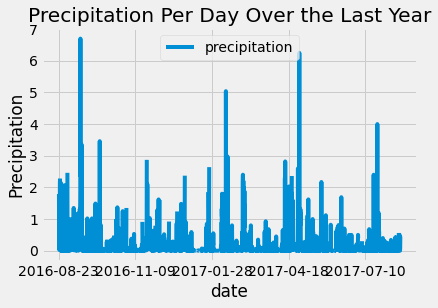

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
graph = prcp_df.plot();
graph.set_title("Precipitation Per Day Over the Last Year");
graph.set_ylabel("Precipitation");

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
Station_Number= session.query(func.count(Station.id)).all()
Station_Number

[(9)]

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Counts = session.query(Measurement.station, func.count(Measurement.station)).\
                  group_by(Measurement.station).\
                  order_by(func.count(Measurement.station).desc()).all()
Counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [22]:
# Choose the station with the highest number of temperature observations.
temp_data =  session.query(Measurement.date,Measurement.tobs).\
                    filter(Measurement.station == 'USC00519281').\
                    filter(Measurement.date >= year_back).all()
temp_data[:10]



[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0)]

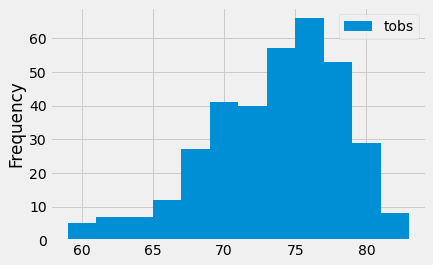

In [23]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp_df= pd.DataFrame(temp_data)
Temp_df.plot(kind="hist",bins=12);

## Bonus Challenge Assignment

In [50]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [65]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# applying the calc_temps function to our trip time.
trip_start_date = '2017-03-12'
trip_end_date = '2017-03-28'

#calculated trip start and end date for previous year by subtracting 365 days from planned trip start and end date
trip_start_prev = dt.datetime.strptime(trip_start_date, '%Y-%m-%d') - dt.timedelta(days=365)
trip_end_prev = dt.datetime.strptime(trip_end_date, '%Y-%m-%d') - dt.timedelta(days=365)
my_trip = calc_temps(trip_start_prev, trip_end_prev) #("2017-03-14", "2017-03-28")

print(f"Min Temp estimated during vacation: {my_trip[0][0]} F")
print(f"Avg Temp estimated during vacation: {round(my_trip[0][1], 2)} F")
print(f"Max Temp estimated during vacation: {my_trip[0][2]} F")

Min Temp estimated during vacation: 63.0 F
Avg Temp estimated during vacation: 70.82 F
Max Temp estimated during vacation: 82.0 F


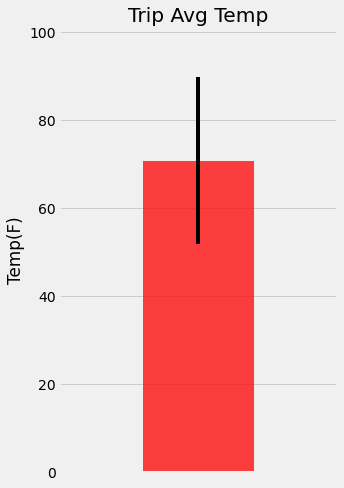

In [66]:
# Plot the min, avg, and max Temperatures from the Previous Query as a Bar Chart

my_trip_df = pd.DataFrame(my_trip, columns=["TMIN", "TAVG", "TMAX"])

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr = my_trip_df["TMAX"] - my_trip_df["TMIN"]

# Use the Average Temperature for the y Value
my_trip_df.plot.bar(y="TAVG",yerr=yerr, color='red', alpha=0.75, align='center',figsize=(5,7), legend = None, width = 0.8)

# Use "Trip Avg Temp" as your Title
plt.title('Trip Avg Temp')

# Plot the results from your previous query as a bar chart. 
plt.ylabel('Temp(F)')
plt.ylim(0,101)
plt.xlim(-1,1)
plt.xticks([])
plt.tight_layout()
plt.savefig("Images/trip_avg_temp.png")
plt.show()

In [67]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

#query for precipitation per station on trip dates
sel = ([Station.station, 
        Station.name, 
        func.sum(Measurement.prcp), 
        Station.latitude, 
        Station.longitude, 
        Station.elevation
       ])

stationRain = (session.query(*sel)
                   .filter(Station.station == Measurement.station) \
                   .filter(Measurement.date.between(trip_start_prev,trip_end_prev)) \
                   .group_by(Station.station) \
                   .order_by(func.sum(Measurement.prcp).desc()) \
                   .all())
#convert query object to data frame
rain_trip_db = pd.DataFrame(stationRain, columns = ['Station','Name','Total Precipitation', 'Latitude', 'Longitude', 'Elevation'])
rain_trip_db= pd.DataFrame(stationRain, columns = ['Station','Name','Total Precipitation', 'Latitude', 'Longitude', 'Elevation'])
rain_trip_db

,Station,Name,Total Precipitation,Latitude,Longitude,Elevation
0,USC00513117,"KANEOHE 838.1, HI US",5.42,21.42340,-157.80150,14.6
1,USC00519281,"WAIHEE 837.5, HI US",2.29,21.45167,-157.84889,32.9
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2.08,21.52130,-157.83740,7.0
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",1.68,21.33310,-157.80250,152.4
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",1.11,21.33556,-157.71139,19.5
5,USC00519397,"WAIKIKI 717.2, HI US",0.24,21.27160,-157.81680,3.0
6,USC00517948,"PEARL CITY, HI US",0.00,21.39340,-157.97510,11.9


In [68]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [69]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

#set the start and end date for the trip
trip_start_date = '2018-03-14'
trip_end_date = '2018-03-28'

# Use the start and end date to create a range of dates
startNum = int(trip_start_date[-2:])
endNum = int(trip_end_date[-2:])

#calculate trip length
tripLength = endNum - startNum + 1

#start date as datetime object
trip_start_date = dt.datetime.strptime(trip_start_date, '%Y-%m-%d')

# Stip off the year and save a list of %m-%d strings
datelist = [dt.datetime.strftime(trip_start_date + dt.timedelta(days = x), '%m-%d') 
            for x in range(0, tripLength)]
datelist

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []

for date in datelist:
    normals.append(daily_normals(date))
    
print(f"Chosen Dates: March {startNum} to March {endNum} ({tripLength} day trip)")
for normal in normals:
    print(normal)


Chosen Dates: March 14 to March 28 (15 day trip)
[(62.0, 70.32758620689656, 77.0)]
[(58.0, 68.54716981132076, 76.0)]
[(60.0, 69.70370370370371, 78.0)]
[(57.0, 68.54, 75.0)]
[(57.0, 67.7843137254902, 76.0)]
[(60.0, 69.1, 75.0)]
[(62.0, 70.11764705882354, 80.0)]
[(60.0, 71.07692307692308, 77.0)]
[(65.0, 71.75471698113208, 77.0)]
[(63.0, 70.79629629629629, 78.0)]
[(62.0, 71.5, 77.0)]
[(63.0, 71.5, 78.0)]
[(64.0, 71.38, 80.0)]
[(63.0, 71.53846153846153, 80.0)]
[(59.0, 71.51785714285714, 82.0)]


In [70]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [71]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

#set the start and end date for the trip
trip_start_date = '2018-03-14'
trip_end_date = '2018-03-28'

# Use the start and end date to create a range of dates
startNum = int(trip_start_date[-2:])
endNum = int(trip_end_date[-2:])

#calculate trip length
tripLength = endNum - startNum + 1

#start date as datetime object
trip_start_date = dt.datetime.strptime(trip_start_date, '%Y-%m-%d')

# Stip off the year and save a list of %m-%d strings
datelist = [dt.datetime.strftime(trip_start_date + dt.timedelta(days = x), '%m-%d') 
            for x in range(0, tripLength)]
datelist

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []

for date in datelist:
    normals.append(daily_normals(date))
    
print(f"Chosen Dates: March {startNum} to March {endNum} ({tripLength} day trip)")
for normal in normals:
    print(normal)


Chosen Dates: March 14 to March 28 (15 day trip)
[(62.0, 70.32758620689656, 77.0)]
[(58.0, 68.54716981132076, 76.0)]
[(60.0, 69.70370370370371, 78.0)]
[(57.0, 68.54, 75.0)]
[(57.0, 67.7843137254902, 76.0)]
[(60.0, 69.1, 75.0)]
[(62.0, 70.11764705882354, 80.0)]
[(60.0, 71.07692307692308, 77.0)]
[(65.0, 71.75471698113208, 77.0)]
[(63.0, 70.79629629629629, 78.0)]
[(62.0, 71.5, 77.0)]
[(63.0, 71.5, 78.0)]
[(64.0, 71.38, 80.0)]
[(63.0, 71.53846153846153, 80.0)]
[(59.0, 71.51785714285714, 82.0)]


In [72]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

#extract normals into a list of lists
tripNormals = [np.array(normal[0]) for normal in normals]

#load into a data frame
trip_normals_df = pd.DataFrame(tripNormals, columns = ["tmin","avg","tmax"])

#find daterange from trip start date and trip length
trip_dates = pd.date_range(trip_start_date, periods=tripLength).tolist()

#set index as Date (convert from Tmestamp to YYYY-MM-DD format)
trip_normals_df.index = [(date.strftime('%Y-%m-%d')) for date in trip_dates]

#display
trip_normals_df


,tmin,avg,tmax
2018-03-14,62.0,70.327586,77.0
2018-03-15,58.0,68.547170,76.0
2018-03-16,60.0,69.703704,78.0
2018-03-17,57.0,68.540000,75.0
2018-03-18,57.0,67.784314,76.0
2018-03-19,60.0,69.100000,75.0
2018-03-20,62.0,70.117647,80.0
2018-03-21,60.0,71.076923,77.0
2018-03-22,65.0,71.754717,77.0
2018-03-23,63.0,70.796296,78.0


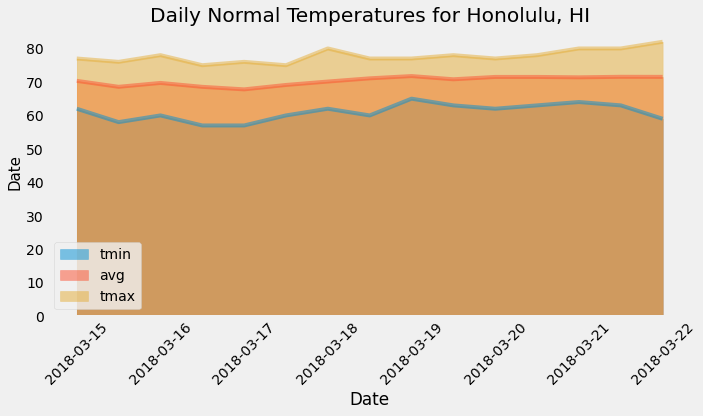

In [73]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(figsize = (10, 6))
trip_normals_df.plot.area(ax = ax, stacked = False)

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (Fahrenheit)')
ax.set_title('Daily Normal Temperatures for Honolulu, HI')

#set ticks
plt.ylabel("Date",fontsize=15)

#ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels(trip_normals_df.index, rotation = 45)

#save figure
plt.savefig('Images/dailynormarea.png')

#show
plt.grid()
plt.tight_layout()
plt.show()
